In [1]:
#F=C*1.8+32

In [2]:
import tensorflow as tf
import numpy as np
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor= 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity_interactivity = "last_expr"
pd.options.display.max_columns= 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
import math
from keras.models import Sequential
#there are also Functional and Subclassing
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import keras
keras.backend.backend()

'tensorflow'

In [6]:
#import data
from keras.datasets import mnist

In [7]:
#train test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [8]:
#print(x_train)
type(x_train)
print(len(x_train[0][0]))
print(x_train[0])

28
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198

In [9]:
x_train.shape[0]
#x_train = 60000 rows ; each row is a 28x28 matrix

60000

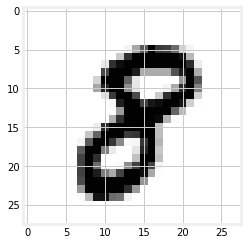

In [10]:
#visual inspection
plt.imshow(x_train[randint(0, x_train.shape[0])], cmap='gray_r')
#randint(lower bound, upper bound)

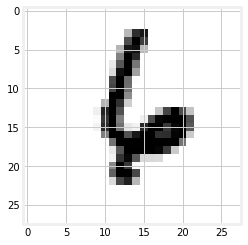

In [11]:
i= 57641
plt.imshow(x_train[i], cmap='gray_r')

In [12]:
y_train[i]

6

In [13]:
#munge data
#transform from matrix to vector, cast and normalize

In [14]:
#reshape the matrix to a vector
image_size= 28*28
x_train = x_train.reshape(x_train.shape[0], image_size)
x_train = x_train.astype('float32')
print(x_train)
print(len(x_train))
print(len(x_train[0]))
#normalizing the data (0,1)
x_train /= 255

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
60000
784


In [15]:
image_size= 28*28
x_test = x_test.reshape(x_test.shape[0], image_size)
x_test = x_test.astype('float32')
x_test /= 255

In [16]:
#redefine the output catagories
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [17]:
#import most common neural network
from keras.models import Sequential

In [18]:
#define model instance
model= Sequential()
#placeholder .. we shall feed the model later
#model.add(keras.layers.Flatten())

In [19]:
#import most common neural network layer fully connected
from keras.layers import Dense

In [20]:
#define input layer
layer_input = Dense(units=512, activation = 'sigmoid', input_shape=(image_size,))
#units are the number of nodes 512 is a arbitrary number trial and error method
model.add(layer_input)

In [21]:
#define another layer
model.add(Dense(units=512, activation = 'sigmoid'))

In [22]:
layer_output = Dense(units=10, activation = 'softmax')
model.add(layer_output)

In [23]:
#model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])

In [25]:
#train the model to learn weights
train= model.fit(x_train, y_train, epochs=5, verbose=True, validation_split=.01)

Epoch 1/5
1857/1857 [==============================] - 15s 8ms/step - loss: 2.1277 - accuracy: 0.3438 - val_loss: 1.8337 - val_accuracy: 0.5367
Epoch 2/5
1857/1857 [==============================] - 15s 8ms/step - loss: 1.3904 - accuracy: 0.6941 - val_loss: 0.9110 - val_accuracy: 0.8383
Epoch 3/5
1857/1857 [==============================] - 15s 8ms/step - loss: 0.8111 - accuracy: 0.8044 - val_loss: 0.5534 - val_accuracy: 0.8900
Epoch 4/5
1857/1857 [==============================] - 15s 8ms/step - loss: 0.5979 - accuracy: 0.8459 - val_loss: 0.4236 - val_accuracy: 0.9133
Epoch 5/5
1857/1857 [==============================] - 15s 8ms/step - loss: 0.4992 - accuracy: 0.8665 - val_loss: 0.3708 - val_accuracy: 0.9250


In [26]:
#x_train_1= keras.utils.normalize(x_train, axis=1)
#X_test_1 = keras.utils.normalize(x_test, axis=1)

# validation

In [28]:
#val_loss = validattion loss, val_acc= validation accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4484 - accuracy: 0.8777
0.44840186834335327 0.8776999711990356


# save and load the model

In [29]:
model.save('our_model.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: our_model.model\assets


In [30]:
model_2= keras.models.load_model('our_model.model')

# Prediction

In [31]:
prediction= model_2.predict(x_test)

In [32]:
print(prediction)

[[2.0498301e-04 1.5536265e-05 5.9552160e-05 ... 9.8746002e-01
  9.3907140e-05 1.0576728e-02]
 [3.2342263e-02 9.6402137e-04 6.1717761e-01 ... 3.5889591e-06
  2.6463922e-02 1.0395699e-05]
 [2.1864073e-05 9.3534857e-01 1.6790902e-02 ... 1.2348443e-02
  9.3050497e-03 2.9807708e-03]
 ...
 [1.2542372e-05 1.1202126e-04 1.3113310e-04 ... 4.8561175e-03
  2.7966028e-02 3.1309602e-01]
 [1.2768756e-02 8.4701031e-03 1.1511432e-02 ... 3.6283366e-03
  2.9300821e-01 1.4210662e-02]
 [2.0459048e-03 2.0257953e-07 5.6948233e-03 ... 1.1550683e-07
  8.2455270e-05 6.4458859e-06]]


In [46]:
print(np.argmax(prediction[1]))

2


In [47]:
x_test = x_test.reshape(x_test.shape[0], 28,28)

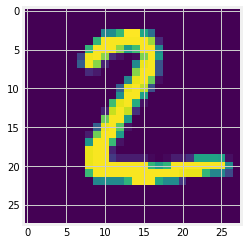

In [48]:
plt.imshow(x_test[1])
plt.show()